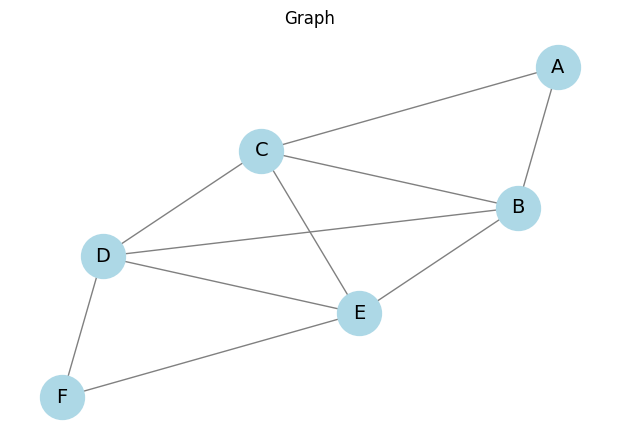

In [24]:
#GAMBARAN GRAPH YANG DIBUAT

import matplotlib.pyplot as plt
import networkx as nx

graph = {
    'A' : ['B','C'],
    'B' : ['A','C','D','E'],
    'C' : ['A','B','D','E'],
    'D' : ['B','C','E','F'],
    'E' : ['B','C','D','F'],
    'F' : ['D','E']
}

G = nx.Graph()
for node, neighbors in graph.items():
    for i in neighbors:
        G.add_edge(node, i)

plt.figure(figsize=(6, 4))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=1000, font_size=14)
plt.title("Graph")
plt.show()

In [2]:
#1. MENAMPILKAN GRAPH TAK BERARAH

graph = {         #inisialisasi graph
    'A' : ['B','C'],
    'B' : ['A','C','D','E'],
    'C' : ['A','B','D','E'],
    'D' : ['B','C','E','F'],
    'E' : ['B','C','D','F'],
    'F' : ['D','E']
}

def show(graf): #menampilkan graph dengan perulangan
  for i in graf:
    print(f'{i} -> {graf[i]}')

show(graph)

A -> ['B', 'C']
B -> ['A', 'C', 'D', 'E']
C -> ['A', 'B', 'D', 'E']
D -> ['B', 'C', 'E', 'F']
E -> ['B', 'C', 'D', 'F']
F -> ['D', 'E']


In [18]:
#2. TRAVERSAL GRAPH - BFS

from collections import deque

def bfs(graph, start):  #fungsi bfs
  visited = set() #membuat set kosong untuk menyimpan simpul yang dikunjungi
  queue = deque([start])  #membuat list berisi simpul saat ini

  while queue:
    vertex = queue.popleft()  #mengambil data simpul saat ini
    if vertex not in visited: #mengecek simpul saat ini di visited
      print(vertex, end=' ')
      visited.add(vertex) #menambahkan simpul saat ini ke visited
      queue.extend([i for i in graph[vertex] if i not in visited])  #menambahkan data tetangga ke list queue

bfs(graph, 'D')

D B C E F A 

In [ ]:
#2. TRAVERSAL GRAPH - DFS

def dfs(graph, start, visited=None):
  if visited is None:
    visited = set()   #membuat set kosong untuk menyimpan simpul yang dikunjungi

  if start not in visited: #mengecek simpul saat ini di visited
    print(start, end=' ')
    visited.add(start)  #menambahkan simpul saat ini ke visited
    for i in graph[start]:
      dfs(graph, i, visited)  #menjalankan fungsi dfs dari tetangga simpul saat ini

dfs(graph, 'D')

D B A C E F 

In [ ]:
#3. TRAVERSAL GRAPH - BFS MODIFIKASI

from collections import deque

def bfs(graph, start):    #fungsi bfs
  visited = set() #membuat set kosong untuk menyimpan simpul yang dikunjungi
  queue = deque([start]) #membuat list berisi simpul saat ini
  urutan = [] #membuat list kosong untuk menyimpan simpul saat ini

  while queue:
    vertex = queue.popleft()  #mengambil data simpul saat ini
    if vertex not in visited: #mengecek simpul saat ini di visited
      visited.add(vertex) #menambahkan simpul saat ini ke visited
      urutan.append(vertex) #menambahkan simpul saat ini ke urutan
      queue.extend([i for i in graph[vertex] if i not in visited]) #menambahkan data tetangga ke list queue
  return urutan

start = 'D'
urutan = bfs(graph,start)
print(f'Urutan graph dimulai dari {start} adalah :')
print(' -> '.join(urutan))  #menampilkan list urutan dengan pemisah '->' tiap datanya

Urutan graph dimulai dari D adalah :
D -> B -> C -> E -> F -> A


In [23]:
#4. TRAVERSAL GRAPH - DFS MODIFIKASI

def find_path(graph, start, end, visited=None, path=None):
    if visited is None:
        visited = set() #membuat set kosong untuk menyimpan simpul yang dikunjungi
    if path is None:
        path = [] #membuat set kosong untuk menyimpan simpul saat ini

    visited.add(start)
    path.append(start)

    if start == end:
        return path  #langsung mengembalikan nilai start jika start dan end sama

    for i in graph[start]:  #mengecek tetangga simpul saat ini
        if i not in visited:  #mengecek tetangga simpul apakah berada di visited
            hasil = find_path(graph, i, end, visited, path) #menjalankan fungsi rekursif
            if hasil:
                return hasil
    return None  #jika tidak ada rute


start = 'A'
end = 'F'
urutan = find_path(graph, start, end)
print(f'Rute graph dari {start} menuju {end} adalah :')
print(' -> '.join(urutan))

Rute graph dari A menuju F adalah :
A -> B -> C -> D -> E -> F


In [17]:
#5. IS CONNECTED - DFS

def is_connected(graph):
    if not graph: #mengecek apakah graph tidak ada
        print('Tidak ada simpul/graph yang terhubung')
        return

    visited = set() #membuat set kosong untuk menyimpan simpul yang dikunjungi
    start = next(iter(graph))  #mengambil tiap kunci pada dict graph dan diiterasikan

    def dfs(node):
        if node not in visited:
            visited.add(node) #menambahkan simpul saat ini ke visited
            for i in graph[node]:
                dfs(i) #rekursif pada anggota graph[node]

    dfs(start)  #fungsi rekursif
    return 'Semua simpul dalam graph saling terhubung'

print(is_connected(graph))

Semua simpul dalam graph saling terhubung
